## Train a model

#### Get the data

In [1]:
import numpy as np

import cv_model as cv

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# get keras model
# the function preprocess_input is keras model dependent, so this is abstracted in a function so all the correct information can be produced at once
base_model, model_name, preprocess_input = cv.get_keras_model()

In [3]:

# label mapping maps the numerically encoded label e.g. 1 back to the label e.g.'butter_naan'
mapping_dct = cv.get_label_mapping()

# get the fully split data that has been processed by the model specific preprocess_input function
X_train, y_train, X_test, y_test, X_val, y_val, label_encoder = cv.get_split_data(preprocess_input, model_name)

#### Train the model

In [4]:
# get number of classes to use as training target
num_classes = len(mapping_dct.values())

# the tasty_model uses transfer learning on the keras model and adds some layers for our use case
tasty_model = cv.get_tasty_model(base_model, num_classes)

# set the optimizer, learning rate, loss, and target metrics
tasty_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# training params
batch_size = 32
epochs = 20
spe = len(X_train) // batch_size    
verbose = 1

# Augment the training data with a generaator.
# This improves performance with a small amount of data while reducing chance of overfitting due to the model not seeing the exact same image twice.
data_gen = ImageDataGenerator(rotation_range=30, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest")
flow = data_gen.flow(X_train, y_train, batch_size=batch_size)

# train
history = tasty_model.fit(flow, validation_data=(X_val, y_val), epochs=epochs, steps_per_epoch=spe, verbose=verbose)

# Evaluate model
val_loss, val_accuracy = tasty_model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')

Epoch 1/20
149/149 [==============================] - 69s 343ms/step - loss: 2.7497 - accuracy: 0.4128 - val_loss: 1.5577 - val_accuracy: 0.6761
Epoch 2/20
149/149 [==============================] - 51s 339ms/step - loss: 2.0212 - accuracy: 0.5582 - val_loss: 1.3852 - val_accuracy: 0.7379
Epoch 3/20
149/149 [==============================] - 52s 350ms/step - loss: 1.6664 - accuracy: 0.6135 - val_loss: 1.0612 - val_accuracy: 0.7796
Epoch 4/20
149/149 [==============================] - 52s 351ms/step - loss: 1.3333 - accuracy: 0.6514 - val_loss: 1.1627 - val_accuracy: 0.7730
Epoch 5/20
149/149 [==============================] - 52s 351ms/step - loss: 1.1558 - accuracy: 0.6804 - val_loss: 1.0809 - val_accuracy: 0.7730
Epoch 6/20
149/149 [==============================] - 52s 349ms/step - loss: 1.0630 - accuracy: 0.7061 - val_loss: 1.1980 - val_accuracy: 0.7997
Epoch 7/20
149/149 [==============================] - 53s 352ms/step - loss: 1.0198 - accuracy: 0.7078 - val_loss: 1.4828 - val_ac

##### Visualize Training Progress

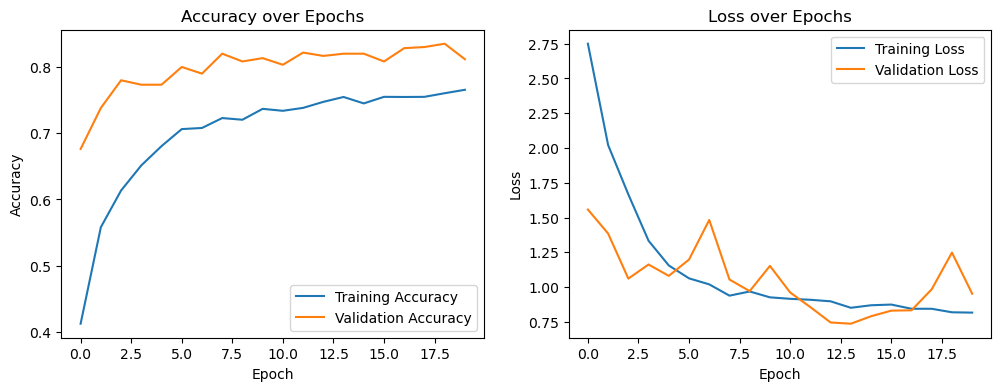

In [5]:
# Plotting training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Results

#### Confusion Matrix

19/19 [==============================] - 9s 263ms/step


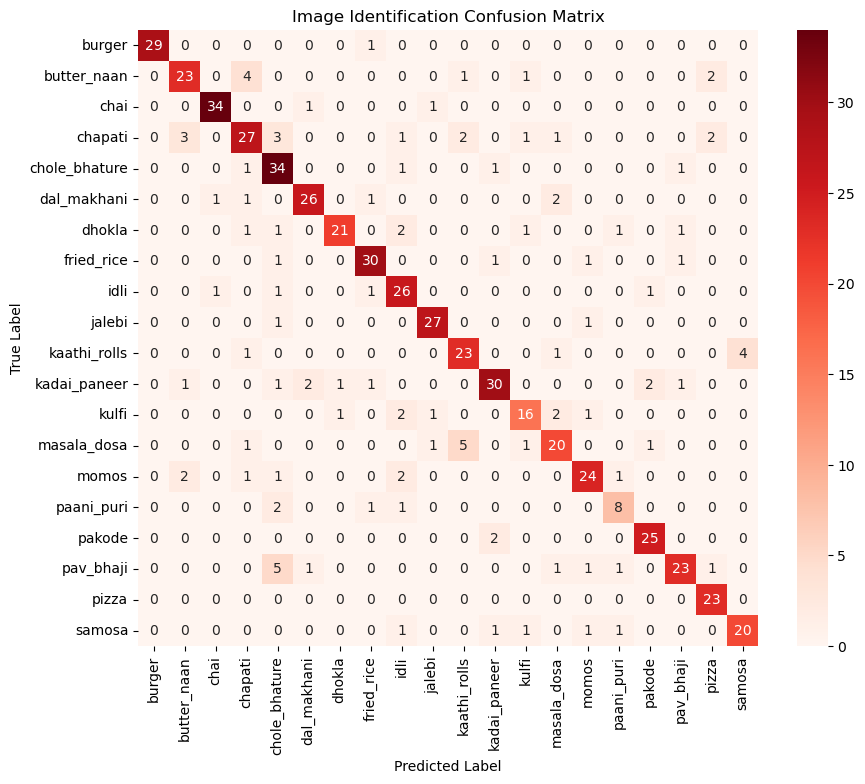

In [6]:
# predictions
y_pred = tasty_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# true values
y_true = np.argmax(y_test, axis=1)

# convert to readible labels
labels = label_encoder.inverse_transform(range(0,20))

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',  xticklabels=labels, yticklabels=labels)
plt.title('Image Identification Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

#### Precision and Recall

##### Class distribution

The barplot is an interesting place to start.  It would be interesting to combine the idea of how many examples there were, vs precision.

<Axes: >

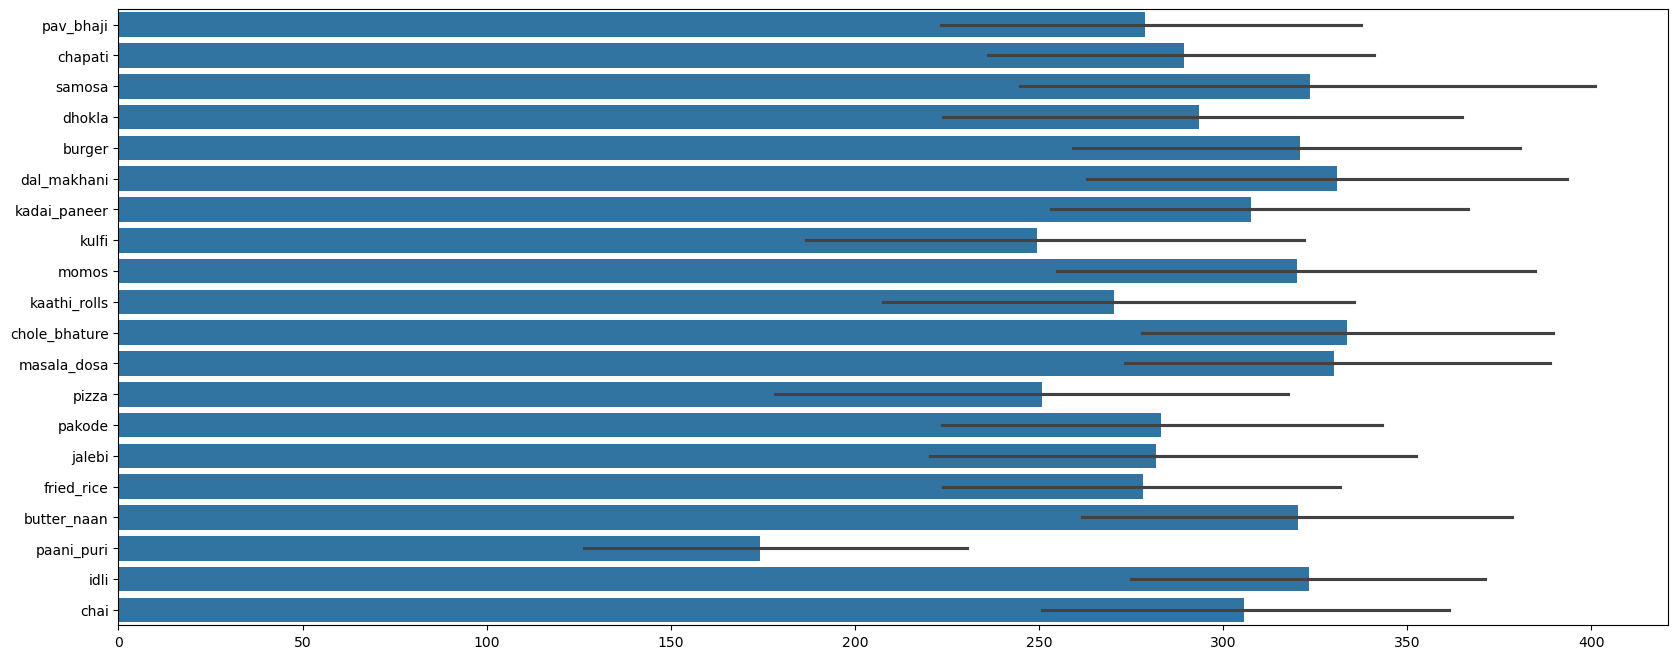

In [7]:
# convert to readible labels
labels_freq = label_encoder.inverse_transform(y_true)

plt.figure(figsize=(20, 8))
sns.barplot(labels_freq)

##### Macro Averaging

##### Micro Averaging